# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = train.append(test, ignore_index=True)

### Data exploration

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",male,347082,G6,S
freq,1,577,7,4,644


### Visualization

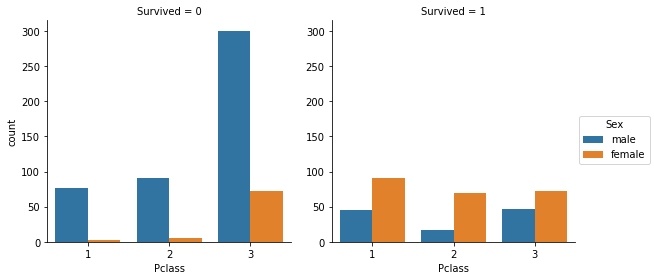

In [8]:
g = sns.factorplot(x='Pclass', col='Survived', hue='Sex', data=train, kind='count')

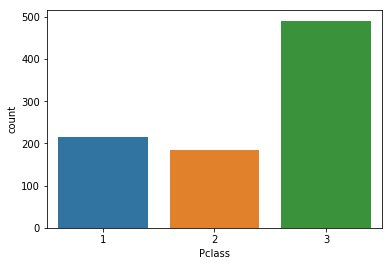

In [9]:
g = sns.countplot(x='Pclass', data=train)

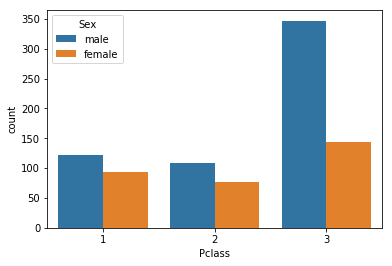

In [10]:
g = sns.countplot(x="Pclass", hue="Sex", data=train)

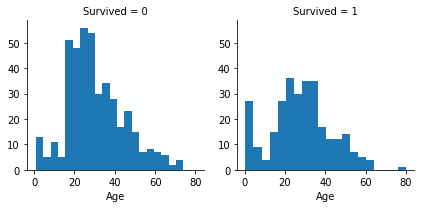

In [11]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

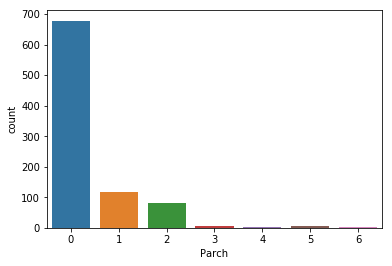

In [12]:
g = sns.countplot(x='Parch', data=train)

### Creating new features

In [13]:
all_data['Relations'] = all_data["Parch"] + all_data["SibSp"]

In [14]:
decks = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
all_data['Deck'] = all_data['Cabin'].fillna('Unknown').apply(lambda ticket: decks.get(ticket[0], 0))

In [15]:
all_data['Title'] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
all_data['Title'] = all_data['Title'].replace(rare_titles, 'Rare')
all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss')
all_data['Title'] = all_data['Title'].replace('Ms', 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

### Data processing

In [16]:
all_data.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

#### Encoding categorical values

In [17]:
all_data['Sex'] = all_data['Sex'].map({'male': 0, 'female': 1})
all_data['Embarked'] = all_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
all_data['Title'] = all_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

#### Completing missing data

In [18]:
all_data['Fare'].fillna(all_data['Fare'].dropna().median(), inplace=True)
all_data['Age'].fillna(all_data['Age'].dropna().median(), inplace=True)
all_data['Embarked'].fillna(all_data['Embarked'].dropna().mode()[0], inplace=True)

#### Checking

In [19]:
all_data.count()

Age            1309
Embarked       1309
Fare           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Relations      1309
Deck           1309
Title          1309
dtype: int64

In [20]:
all_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Relations,Deck,Title
0,22.0,2.0,7.2500,0,1,3,0,1,0.0,1,0,1
1,38.0,0.0,71.2833,0,2,1,1,1,1.0,1,3,3
2,26.0,2.0,7.9250,0,3,3,1,0,1.0,0,0,2
3,35.0,2.0,53.1000,0,4,1,1,1,1.0,1,3,3
4,35.0,2.0,8.0500,0,5,3,0,0,0.0,0,0,1


## Predicting

- Logistic Regression
- K-Nearest Neighbors
- Support Vector Classification
- Gaussian Naive Bayes
- Multi-layer Perceptron Classifier
- Decision Tree Classifier
- Random Forest Classifier
- XGBClassifier

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
X_train = all_data[:len(train)].drop('Survived', axis=1)
y_train = all_data[:len(train)]['Survived']

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_acc = lr_scores.mean()
print("Scores: ", len(lr_scores))
print("Average accuracy : {:.2f}".format(lr_acc))

Scores:  5
Average accuracy : 0.81


### K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_acc = knn_scores.mean()
print("Scores: ", len(knn_scores))
print("Average accuracy : {:.2f}".format(knn_acc))

Scores:  5
Average accuracy : 0.54


### Support Vector Classification

In [25]:
from sklearn.svm import SVC

svc = SVC()
svc_scores = cross_val_score(svc, X_train, y_train, cv=5)
svc_acc = svc_scores.mean()
print("Scores: ", len(svc_scores))
print("Average accuracy : {:.2f}".format(svc_acc))

Scores:  5
Average accuracy : 0.61


### Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian_scores = cross_val_score(gaussian, X_train, y_train, cv=5)
gaussian_acc = gaussian_scores.mean()
print("Scores: ", len(gaussian_scores))
print("Average accuracy : {:.2f}".format(gaussian_acc))

Scores:  5
Average accuracy : 0.78


### Multi-layer Perceptron Classifier

In [27]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, alpha=0.5,
                    solver='adam', tol=1e-4)
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp_acc = mlp_scores.mean()
print("Scores: ", len(mlp_scores))
print("Average accuracy : {:.2f}".format(mlp_acc))

Scores:  5
Average accuracy : 0.69


### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_scores = cross_val_score(dtc, X_train, y_train, cv=5)
dtc_acc = dtc_scores.mean()
print("Scores: ", len(dtc_scores))
print("Average accuracy : {:.2f}".format(dtc_acc))

Scores:  5
Average accuracy : 0.73


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
rfc_acc = rfc_scores.mean()
print("Scores: ", len(rfc_scores))
print("Average accuracy : {:.2f}".format(rfc_acc))

Scores:  5
Average accuracy : 0.81


### XGBClassifier

In [30]:
import xgboost as xg

xgb = xg.XGBClassifier()
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5)
xgb_acc = xgb_scores.mean()
print("Scores: ", len(xgb_scores))
print("Average accuracy : {:.2f}".format(xgb_acc))

/Users/lev/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Scores:  5
Average accuracy : 0.79


## Results

In [31]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'K-Nearest Neighbors',
        'Support Vector Classification',
        'Gaussian Naive Bayes',
        'Multi-layer Perceptron Classifier',
        'Decision Tree Classifier',
        'Random Forest Classifier',
        'XGBClassifier'
    ],
    'Score': [
        lr_acc, 
        knn_acc,
        svc_acc,
        gaussian_acc,
        mlp_acc,
        dtc_acc,
        rfc_acc,
        xgb_acc
    ]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.814843
6,Random Forest Classifier,0.811554
7,XGBClassifier,0.793671
3,Gaussian Naive Bayes,0.775681
5,Decision Tree Classifier,0.731891
4,Multi-layer Perceptron Classifier,0.691416
2,Support Vector Classification,0.613930
1,K-Nearest Neighbors,0.544494


### Submissions

In [32]:
X_test = all_data[len(train):].drop('Survived', axis=1)
model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": X_test['PassengerId'],
        "Survived": prediction.astype(int)
    })

submission.to_csv('./lr_submission.csv', index=False)

In [33]:
model = rfc.fit(X_train, y_train)
prediction = model.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": X_test['PassengerId'],
        "Survived": prediction.astype(int)
    })

submission.to_csv('./rfc_submission.csv', index=False)

### Score on Kaggle

Random Forest Classifier ![Result](rfc_score.png)

Logistic Regression: ![Result](lr_score.png)